## TD N°2 explicabilité du dataset Boston Housing

1) Charger le dataset bostong_housing
   1) Disponible dans le folder 04_interpretable_ml/td/data/
   
2) Nettoyer votre jeu de données pour créer une régression linéaire et un random forest
   1) Tester d'ajouter des features log, quadratique, ...

3)Créer un modèle baseline linéaire et random forest

4) Interpréter le modèle linéaire

5) Tuner votre random forest

6) Interpréter globalement votre modèle meilleur modèle RF 
   1) Utiliser les PDP ou ALE & Permutation feature Importance 
   2) Comparer les résulats du random forest avec votre interprétation du modèle linéaire

6) Réaliser une explicabilité par individu
   1) En utilisant la méthode ICE (PDP individuelle)
   2) LIME (Model local pour expliquer une prédiction)
   3) SHAP watterfall plot (Contribution marginale de chaque variable dans la prédiction)

7) Réaliser une explicabilité par individu sur le modèle RF
- 1) ICE, le PDP est-il une bonne représentation des variables importantes de votre modèle?
- 2) LIME
- 3) SHAP watterfall plot

8) Explorer les graphiques SHAP étudiés  dans la partie CM
   1) beeswarm (Contribution des variables)
   2) scatter (équivalent pdp)

## Contexte du Dataset

Le Boston Housing Dataset est un ensemble de données couramment utilisé en apprentissage automatique et en statistique pour étudier les relations entre diverses caractéristiques socio-économiques et immobilières dans la ville de Boston.  
Il contient des informations sur des propriétés résidentielles et leur environnement, et est souvent utilisé pour prédire la valeur des maisons, un problème classique de régression.

**Variable dispo**: 
- CRIM : taux de criminalité par habitant par ville
- ZN : proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pieds carrés
- INDUS : proportion de terrains commerciaux non commerciaux par ville
- CHAS : variable binaire indiquant la proximité de la rivière Charles (= 1 si la zone délimitée par la ville touche la rivière ; 0 sinon)
- NOX : concentration des oxydes d'azote (en parties par 10 millions)
- RM : nombre moyen de pièces par logement
- AGE : proportion des unités occupées par leur propriétaire et construites avant 1940
- DIS : distances pondérées vers cinq centres d'emploi de Boston
- RAD : indice d'accessibilité aux autoroutes radiales
- TAX : taux d'imposition foncière par valeur totale pour chaque tranche de 10 000 dollars
- PTRATIO : ratio élèves-enseignants par ville
- LSTAT : pourcentage de la population de statut socio-économique inférieur
- MEDV : valeur médiane des maisons occupées par leur propriétaire (en milliers de dollars) - **variable cible**

In [1]:
#Web request
import requests
import io
import pandas as pd

### 1) Charger le dataset bostong_housing

In [2]:
#Télécharge directement depuis Github
url = "https://raw.githubusercontent.com/Roulitoo/cours_iae/master/04_INTERPRETABLE_ML/td/data/boston_housing.csv" 
download = requests.get(url).content

df = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=';')

In [4]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    int64  
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    int64  
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### 2)Nettoyer votre jeu de données pour créer une régression linéaire et un random forest

Penser à :

- Vérifier comment encoder vos variables qualitatives pour la modélisation 
- Analyser les distributions
- Analyser les outliers 
- Analyser les corrélations

>Tester d'ajouter des features log, quadratique, ...

In [7]:
# Importation des bibliothèques nécessaires

from ydata_profiling import ProfileReport



# Création du rapport de profiling
profile = ProfileReport(df, title="Rapport de Profiling de mon DataFrame Diabete", 
                        explorative=True,  # Mode exploratoire détaillé
                        minimal=False)     # Rapport complet

# Sauvegarde du rapport en HTML
profile.to_file("rapport_profiling_housing.html")

c:\Users\angel\Documents\M1\TD_SVM\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00,  8.27it/s]


In [3]:
#Suppression de l'ID
df.drop(columns=['Unnamed: 0'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,6.48,22.0


In [7]:
import numpy as np

# Suppression de la colonne 'Unnamed: 0'
df2 = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Transformation en log
vars_log = ['MEDV', 'DIS', 'RAD', 'LSTAT']
for var in vars_log:
    df2[f'log_{var}'] = np.log(df2[var])

# Transformation au carré
vars_sqrt = ['RM', 'NOX']
for var in vars_sqrt:
    df2[f'{var}_SQRT'] = df2[var] ** 2

# Suppression des variables d'origine transformées puis des doublons
df2 = df2.drop(columns=vars_log + vars_sqrt)
df2 = df2.drop_duplicates()

# Affichage de la nouvelle base
df2.head()


,CRIM,ZN,INDUS,CHAS,AGE,TAX,PTRATIO,log_MEDV,log_DIS,log_RAD,log_LSTAT,RM_SQRT,NOX_SQRT
0,0.00632,18.0,2.31,0,65.2,296.0,15.3,3.178054,1.408545,0.000000,1.605430,43.230625,0.289444
1,0.02731,0.0,7.07,0,78.9,242.0,17.8,3.072693,1.602836,0.693147,2.212660,41.229241,0.219961
2,0.02729,0.0,7.07,0,61.1,242.0,17.8,3.546740,1.602836,0.693147,1.393766,51.624225,0.219961
3,0.03237,0.0,2.18,0,45.8,222.0,18.7,3.508556,1.802073,1.098612,1.078410,48.972004,0.209764
4,0.06905,0.0,2.18,0,54.2,222.0,18.7,3.589059,1.802073,1.098612,1.673351,51.079609,0.209764


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   AGE        506 non-null    float64
 5   TAX        506 non-null    float64
 6   PTRATIO    506 non-null    float64
 7   log_MEDV   506 non-null    float64
 8   log_DIS    506 non-null    float64
 9   log_RAD    506 non-null    float64
 10  log_LSTAT  506 non-null    float64
 11  RM_SQRT    506 non-null    float64
 12  NOX_SQRT   506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB


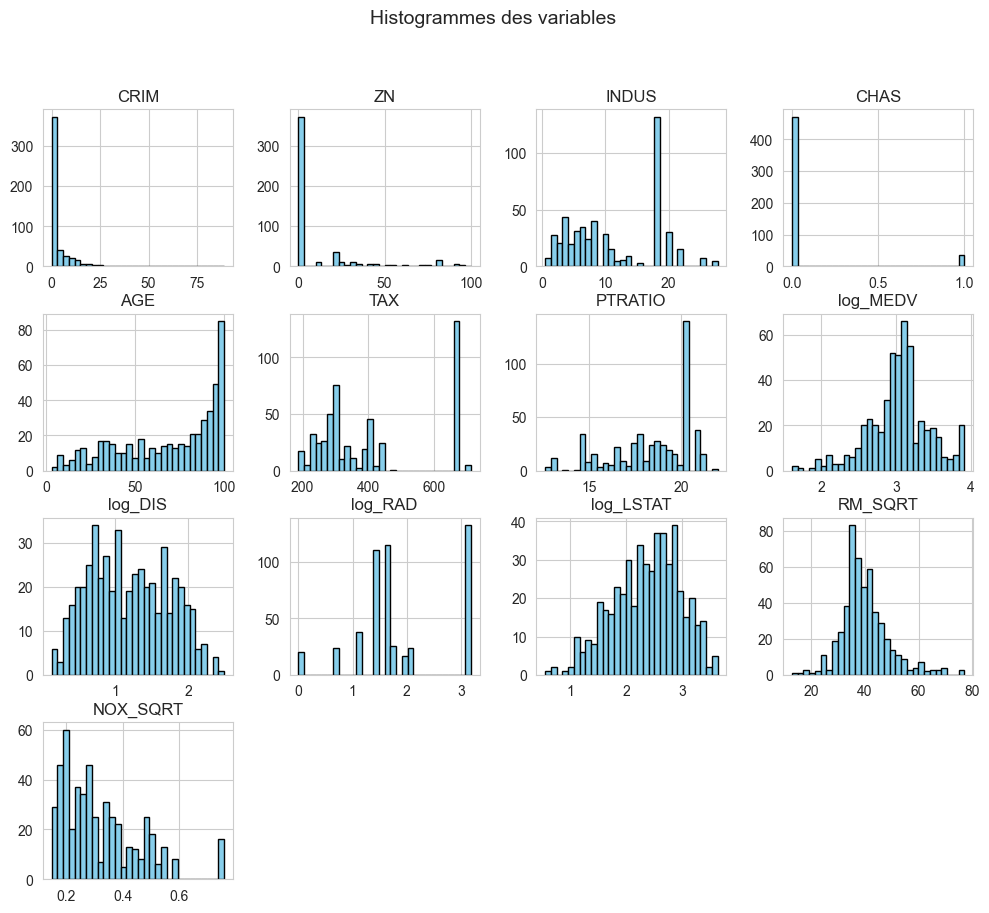

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration générale des graphiques
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
%matplotlib inline

# Histogrammes pour voir la distribution des variables
df2.hist(figsize=(12, 10), bins=30, color="skyblue", edgecolor="black")
plt.suptitle("Histogrammes des variables", fontsize=14)
plt.show(block=False)

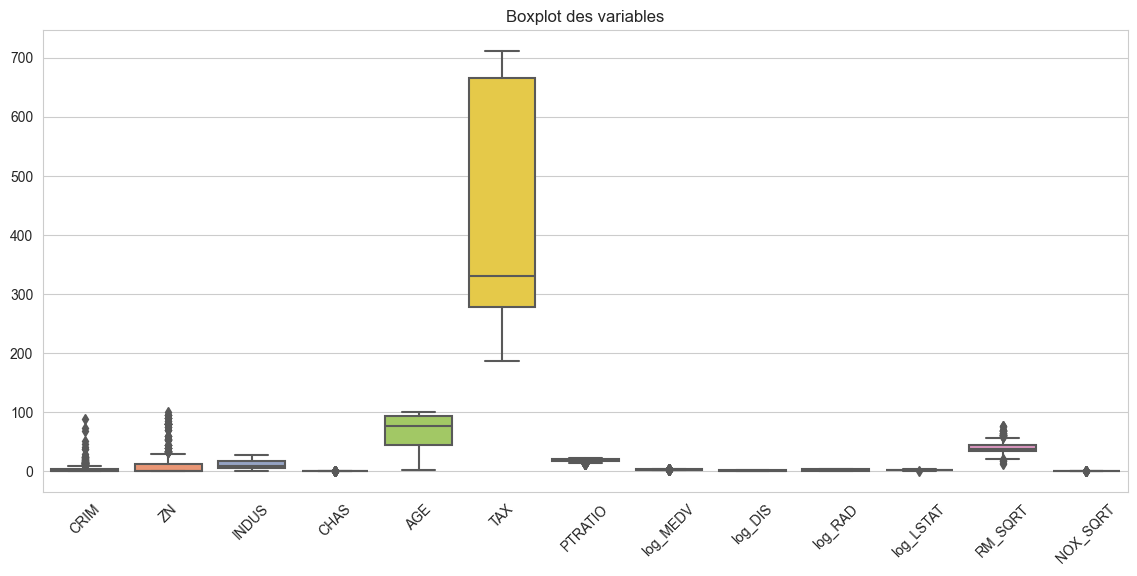

In [19]:
# Boxplots pour identifier les outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=df2, palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplot des variables")
plt.show()

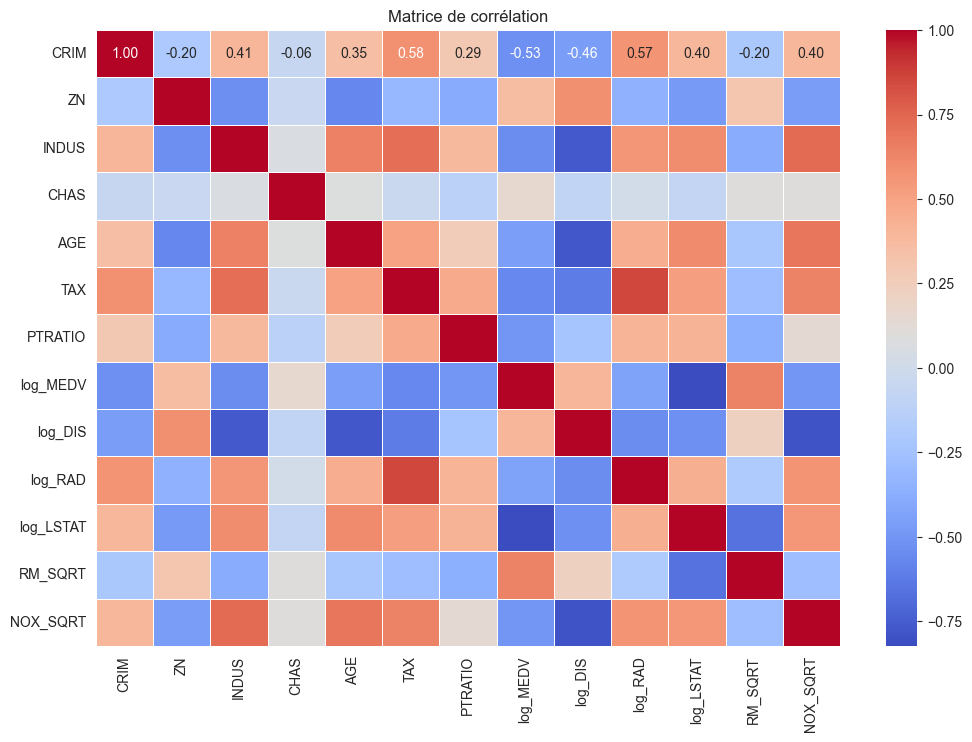

In [24]:
# Heatmap de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(df2.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

In [11]:
# Analyse des valeurs manquantes
missing_values = df2.isnull().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
    plt.xticks(rotation=45)
    plt.title("Valeurs manquantes par variable")
    plt.ylabel("Nombre de valeurs manquantes")
    plt.show()
else:
    print("Aucune valeur manquante détectée.")


Aucune valeur manquante détectée.


c:\Users\angel\Documents\M1\TD_SVM\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\angel\Documents\M1\TD_SVM\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\angel\Documents\M1\TD_SVM\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\angel\Documents\M1\TD_SVM\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

<Figure size 1200x800 with 0 Axes>

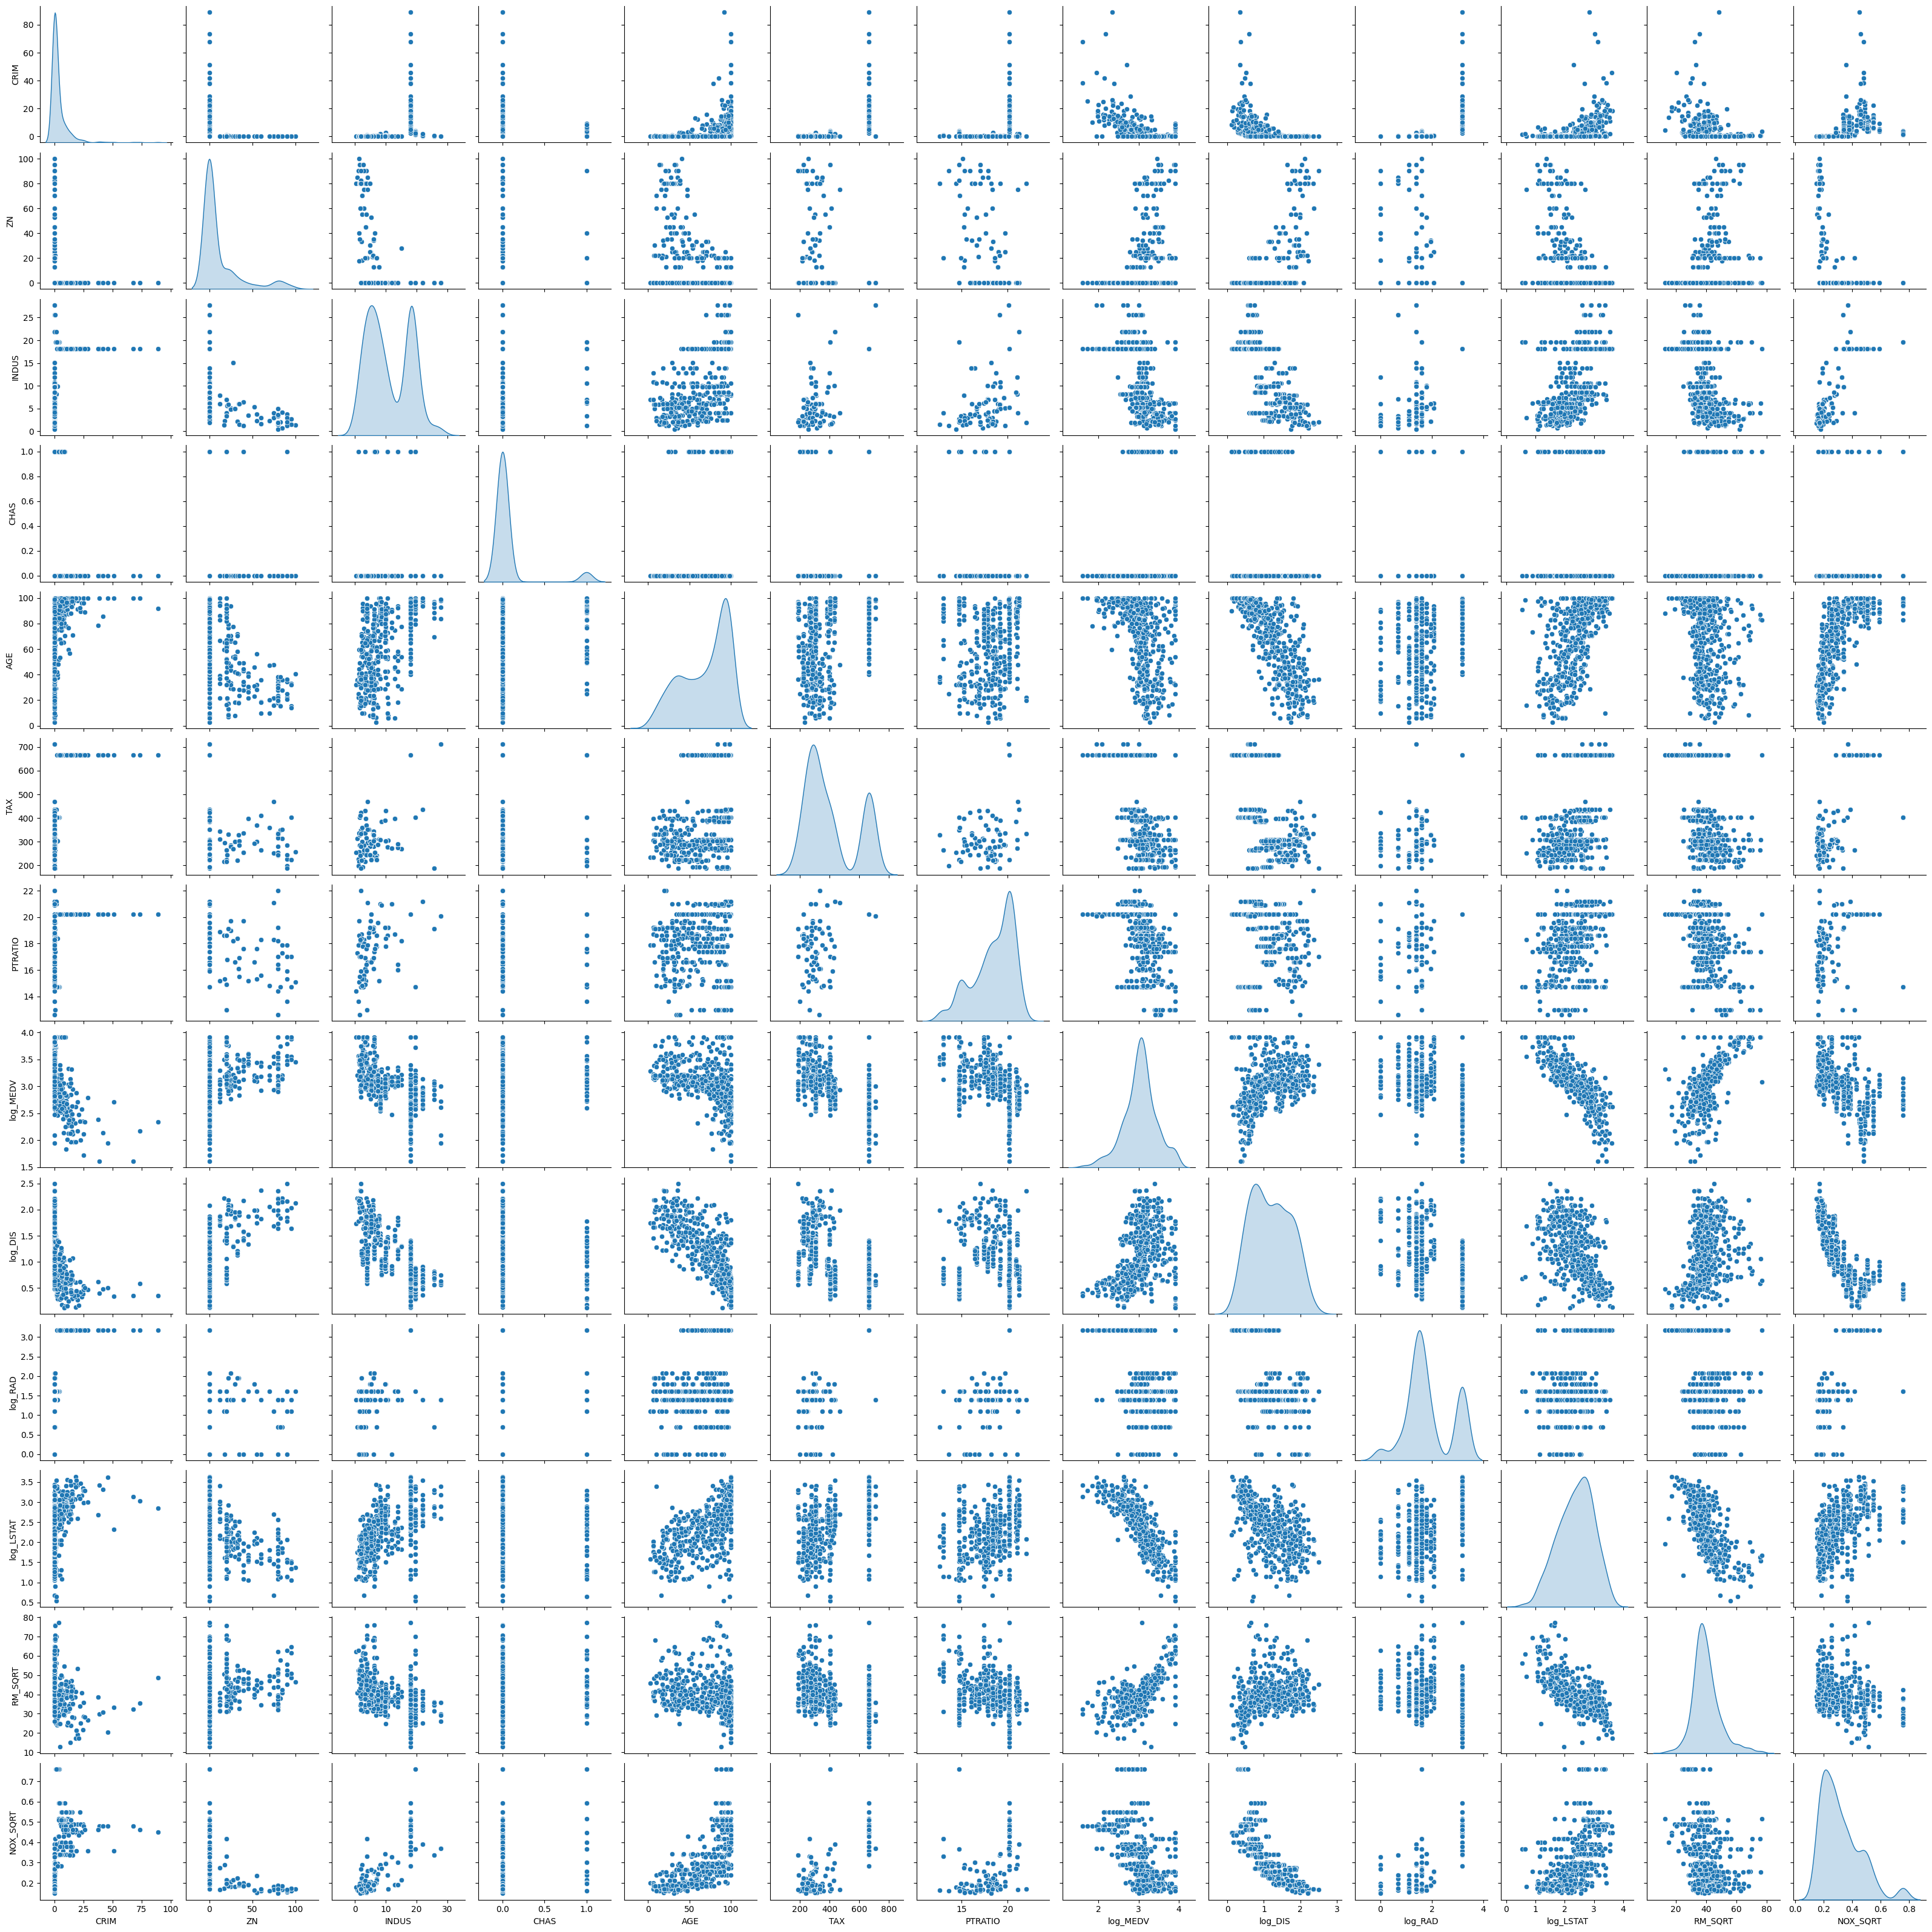

In [12]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Vérifier et remplacer les valeurs infinies par NaN
df2.replace([np.inf, -np.inf], np.nan, inplace=True)

# Supprimer les lignes contenant des NaN pour éviter les erreurs dans Seaborn
df2_clean = df2.dropna()

# Générer le pairplot sans erreur
plt.figure(figsize=(12, 8))
sns.pairplot(df2_clean, diag_kind="kde")  # 'kde' pour des courbes lissées en histogramme
plt.show()


### 3)Créer 2 modèles baseline, linéaire et random forest

In [13]:
# Import des bibliothèques nécessaires
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Préparation des données
# Séparation des features (X) et de la variable cible (y)
X = df2.drop('log_MEDV', axis=1)  # 'log_MEDV' = variable cible
y = df2['log_MEDV']

# Split des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Modèle de régression linéaire
# Création et entraînement du modèle
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [14]:
# Prédictions
linear_pred = linear_model.predict(X_test)

# Évaluation du modèle linéaire
linear_mse = mean_squared_error(y_test, linear_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_pred)

In [15]:
# 3. Modèle Random Forest
# Création et entraînement du modèle
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions
rf_pred = rf_model.predict(X_test)

# Évaluation du modèle Random Forest
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

In [16]:
# Affichage des résultats
print("Résultats du modèle de régression linéaire:")
print(f"RMSE: {linear_rmse:.2f}")
print(f"R²: {linear_r2:.2f}")
print("\nRésultats du modèle Random Forest:")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R²: {rf_r2:.2f}")

Résultats du modèle de régression linéaire:
RMSE: 0.18
R²: 0.79

Résultats du modèle Random Forest:
RMSE: 0.16
R²: 0.83


### 4) Interpréter le modèle linéaire
Utiliser les méthodes intrinsèques du modèle pour l'interprétation

Coefficients du modèle linéaire:
      Feature  Coefficient
3        CHAS     0.097718
8     log_RAD     0.073428
10    RM_SQRT     0.006631
2       INDUS     0.000087
4         AGE    -0.000107
1          ZN    -0.000124
5         TAX    -0.000422
0        CRIM    -0.011521
6     PTRATIO    -0.030430
7     log_DIS    -0.195825
9   log_LSTAT    -0.375613
11   NOX_SQRT    -0.647250

Intercept: 4.737849593470743


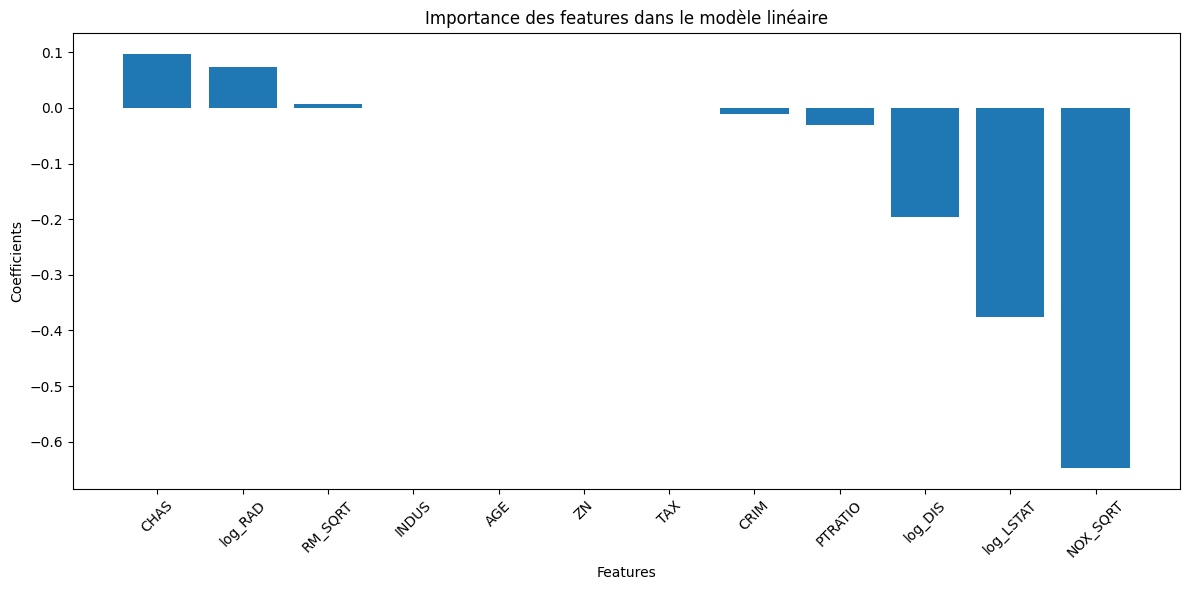


Coefficients standardisés:
      Feature  Coefficient_standardisé
8     log_RAD                 0.081107
10    RM_SQRT                 0.052510
3        CHAS                 0.024543
4         AGE                 0.005509
1          ZN                 0.001863
2       INDUS                -0.000356
6     PTRATIO                -0.066350
5         TAX                -0.075788
11   NOX_SQRT                -0.093809
7     log_DIS                -0.105340
0        CRIM                -0.107694
9   log_LSTAT                -0.230650

Métriques de performance:
R² : 0.795
R² ajusté : 0.789


In [17]:
# 1. Affichage des coefficients du modèle linéaire
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

print("Coefficients du modèle linéaire:")
print(coefficients)
print("\nIntercept:", linear_model.intercept_)

# 2. Visualisation des coefficients
plt.figure(figsize=(12, 6))
plt.bar(coefficients['Feature'], coefficients['Coefficient'])
plt.xticks(rotation=45)
plt.title('Importance des features dans le modèle linéaire')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.tight_layout()
plt.show()

# 3. Calcul des coefficients standardisés
from sklearn.preprocessing import StandardScaler

# Standardisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Création et entraînement d'un nouveau modèle linéaire avec les données standardisées
linear_model_scaled = LinearRegression()
linear_model_scaled.fit(X_scaled, y)

# Affichage des coefficients standardisés
coefficients_scaled = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient_standardisé': linear_model_scaled.coef_
})
coefficients_scaled = coefficients_scaled.sort_values(by='Coefficient_standardisé', ascending=False)

print("\nCoefficients standardisés:")
print(coefficients_scaled)

# 4. Calcul du R² ajusté
n = X_train.shape[0]  # nombre d'observations
p = X_train.shape[1]  # nombre de prédicteurs
r2_adj = 1 - (1 - linear_r2) * (n - 1) / (n - p - 1)

print("\nMétriques de performance:")
print(f"R² : {linear_r2:.3f}")
print(f"R² ajusté : {r2_adj:.3f}")

In [18]:
# 5. Calcul des p-values pour les coefficients
from scipy import stats

# Calcul des prédictions
y_pred = linear_model.predict(X_train)

# Calcul de l'erreur standard des coefficients
n = X_train.shape[0]
p = X_train.shape[1]
dof = n - p - 1  # degrés de liberté
mse = np.sum((y_train - y_pred) ** 2) / dof
var_b = mse * np.linalg.inv(np.dot(X_train.T, X_train)).diagonal()
sd_b = np.sqrt(var_b)
t_stat = linear_model.coef_ / sd_b
p_values = 2 * (1 - stats.t.cdf(np.abs(t_stat), dof))

# Ajout des p-values aux coefficients
coefficients['P-value'] = p_values
print("\nCoefficients avec p-values:")
print(coefficients)


Coefficients avec p-values:
      Feature  Coefficient       P-value
3        CHAS     0.097718  2.220446e-16
8     log_RAD     0.073428  8.339953e-01
10    RM_SQRT     0.006631  9.737016e-01
2       INDUS     0.000087  9.795803e-03
4         AGE    -0.000107  8.561778e-01
1          ZN    -0.000124  2.686813e-03
5         TAX    -0.000422  5.980660e-11
0        CRIM    -0.011521  2.678638e-08
6     PTRATIO    -0.030430  8.151247e-04
7     log_DIS    -0.195825  0.000000e+00
9   log_LSTAT    -0.375613  6.980883e-09
11   NOX_SQRT    -0.647250  6.399317e-08


### 5) Tuner votre random forest

In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
import numpy as np

# 1. Définition des hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# 2. Création du modèle Random Forest de base
rf = RandomForestRegressor(random_state=42)

# 3. Configuration de la recherche par grille
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # validation croisée avec 5 folds
    n_jobs=-1,  # utiliser tous les processeurs disponibles
    scoring='neg_mean_squared_error',
    verbose=2
)


In [22]:
# 4. Entraînement du modèle avec recherche par grille
grid_search.fit(X_train, y_train)

# 5. Affichage des meilleurs paramètres
print("Meilleurs paramètres trouvés:")
print(grid_search.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


c:\Users\angel\Documents\M1\TD_SVM\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
838 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\angel\Documents\M1\TD_SVM\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\angel\Documents\M1\TD_SVM\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\angel\Documents\M1\TD_SVM\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File

Meilleurs paramètres trouvés:
{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [23]:
# 6. Évaluation du modèle optimisé
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Calcul des métriques
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print("\nPerformances du modèle optimisé:")
print(f"RMSE: {rmse_best:.2f}")
print(f"R²: {r2_best:.2f}")


Performances du modèle optimisé:
RMSE: 0.14
R²: 0.88


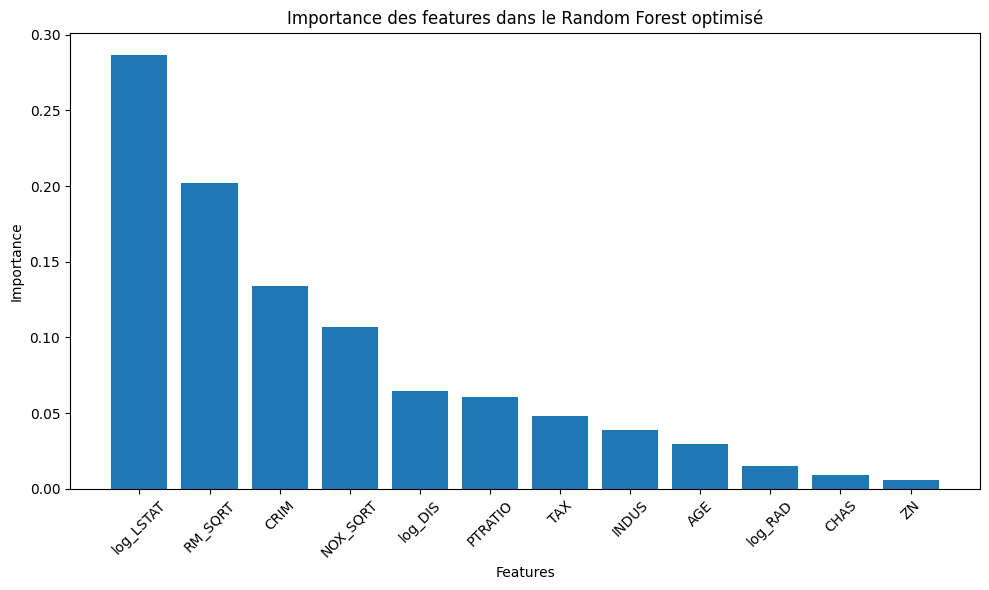


Comparaison avec le modèle baseline:
RMSE Baseline: 0.16
RMSE Optimisé: 0.14
R² Baseline: 0.83
R² Optimisé: 0.88


In [24]:
# 7. Importance des features avec le meilleur modèle
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Visualisation de l'importance des features
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xticks(rotation=45)
plt.title('Importance des features dans le Random Forest optimisé')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# 8. Comparaison avec le modèle baseline
print("\nComparaison avec le modèle baseline:")
print(f"RMSE Baseline: {rf_rmse:.2f}")
print(f"RMSE Optimisé: {rmse_best:.2f}")
print(f"R² Baseline: {rf_r2:.2f}")
print(f"R² Optimisé: {r2_best:.2f}")

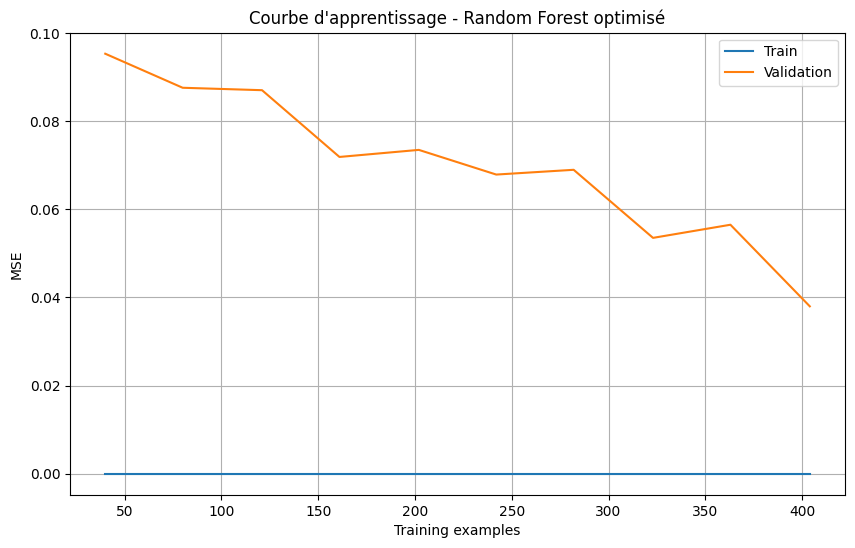

In [25]:
# 9. Courbes d'apprentissage
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='neg_mean_squared_error'
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Train')
    plt.plot(train_sizes, test_scores_mean, label='Validation')
    plt.xlabel('Training examples')
    plt.ylabel('MSE')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

plot_learning_curve(best_rf, X, y, 'Courbe d\'apprentissage - Random Forest optimisé')

### 6) Interpréter globalement votre modèle meilleur modèle RF 
   1) Utiliser les PDP ou ALE & Permutation feature Importance 
   2) Comparer les résulats du random forest avec votre interprétation du modèle linéaire

1. Calcul de la Permutation Feature Importance...


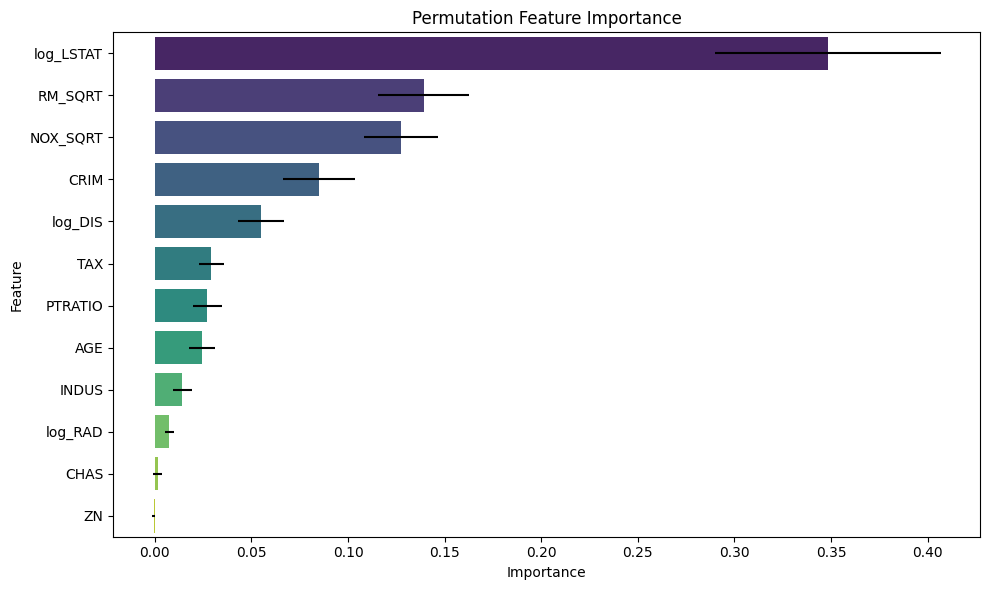


2. Génération des PDP pour les features les plus importantes...

PDP pour log_LSTAT


<Figure size 1000x600 with 0 Axes>

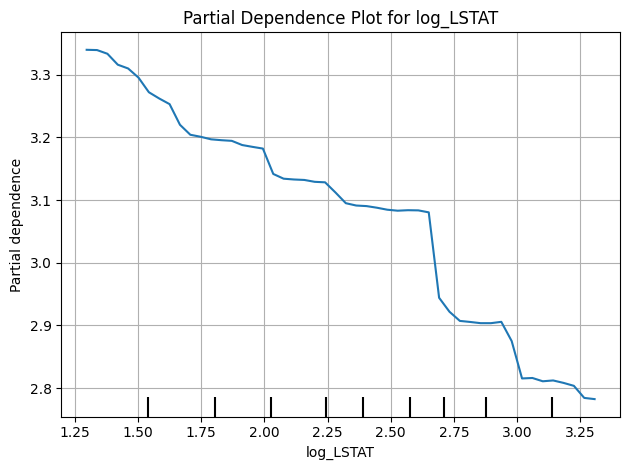


PDP pour RM_SQRT


<Figure size 1000x600 with 0 Axes>

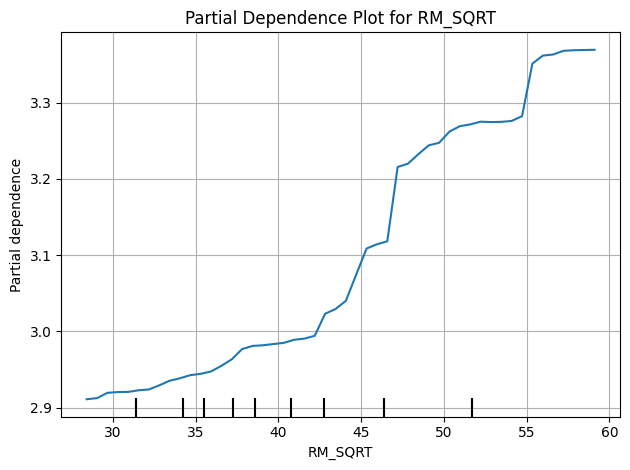


PDP pour NOX_SQRT


<Figure size 1000x600 with 0 Axes>

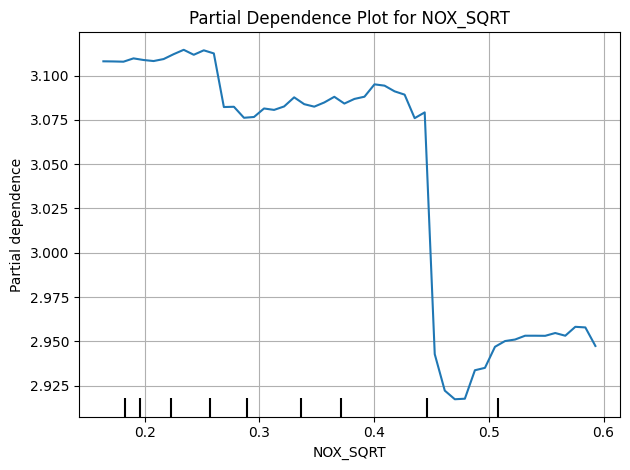


3. Calcul des valeurs SHAP...


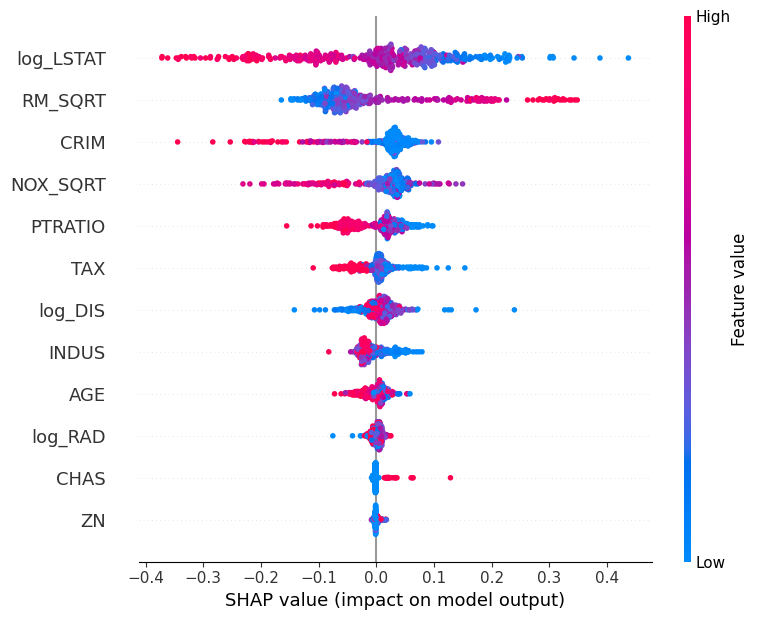


4. Comparaison avec le modèle linéaire...


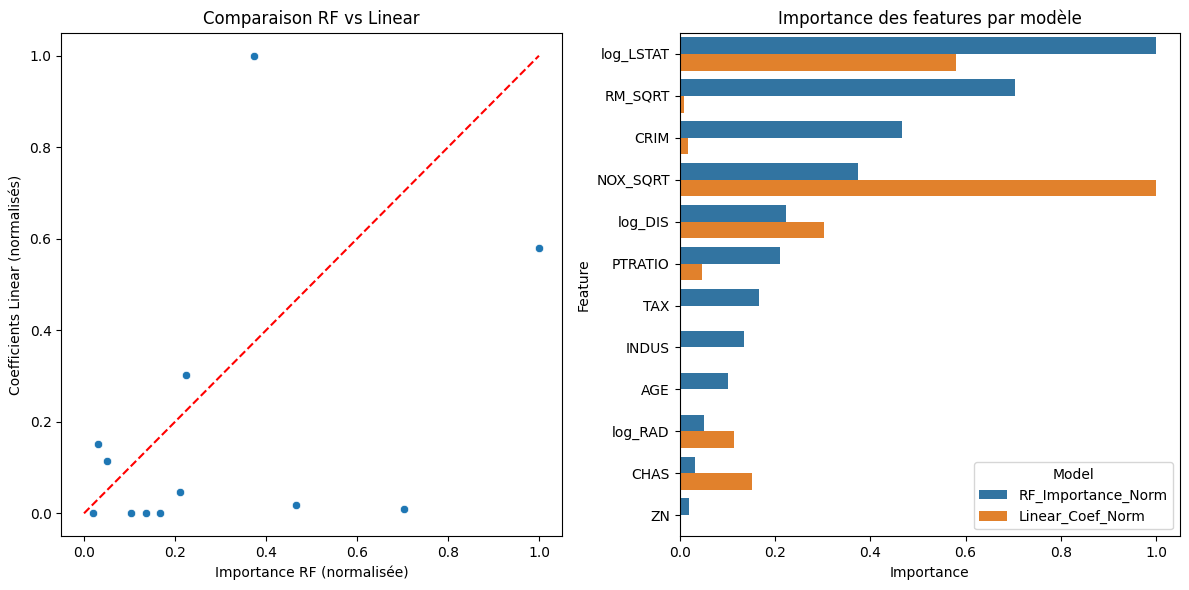


Conclusions principales:
1. Features les plus importantes selon la permutation importance:
      Feature  Importance       Std
9   log_LSTAT    0.348247  0.058496
10    RM_SQRT    0.139206  0.023617
11   NOX_SQRT    0.127278  0.019189
0        CRIM    0.084895  0.018804
7     log_DIS    0.054857  0.011774

2. Principales différences entre RF et modèle linéaire:
     Feature  RF_Importance  Linear_Coef  RF_Importance_Norm  Linear_Coef_Norm
0  log_LSTAT       0.286848     0.375613            1.000000          0.580322
1    RM_SQRT       0.201847     0.006631            0.703674          0.010245
2       CRIM       0.133764     0.011521            0.466324          0.017800
3   NOX_SQRT       0.107118     0.647250            0.373431          1.000000
4    log_DIS       0.064257     0.195825            0.224011          0.302549


In [ ]:
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import shap

# 1. Permutation Feature Importance
def plot_permutation_importance(model, X, y, n_repeats=10):
    perm_importance = permutation_importance(model, X, y, n_repeats=n_repeats)
    
    perm_imp_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': perm_importance.importances_mean,
        'Std': perm_importance.importances_std
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=perm_imp_df, 
                palette='viridis', xerr=perm_imp_df['Std'])
    plt.title('Permutation Feature Importance')
    plt.tight_layout()
    plt.show()
    
    return perm_imp_df

# 2. Partial Dependence Plots (PDP) avec sklearn
def plot_pdp_sklearn(model, X, feature_name):
    # Création du plot
    plt.figure(figsize=(10, 6))
    
    # Utilisation de PartialDependenceDisplay
    display = PartialDependenceDisplay.from_estimator(
        model,
        X,
        [feature_name],
        kind="average",
        grid_resolution=50,
        random_state=42
    )
    
    # Personnalisation du plot
    plt.xlabel(feature_name)
    plt.ylabel('Partial dependence')
    plt.title(f'Partial Dependence Plot for {feature_name}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 3. SHAP Values
def plot_shap_summary(model, X):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X)
    plt.tight_layout()
    plt.show()

# 4. Comparaison avec le modèle linéaire
def compare_models_coefficients(rf_model, linear_model, X):
    # Importance des features pour RF
    rf_importance = pd.DataFrame({
        'Feature': X.columns,
        'RF_Importance': rf_model.feature_importances_
    }).sort_values('RF_Importance', ascending=False)
    
    # Coefficients du modèle linéaire
    linear_coef = pd.DataFrame({
        'Feature': X.columns,
        'Linear_Coef': np.abs(linear_model.coef_)
    }).sort_values('Linear_Coef', ascending=False)
    
    # Fusion des résultats
    comparison = pd.merge(rf_importance, linear_coef, on='Feature')
    
    # Normalisation des valeurs pour une meilleure comparaison
    comparison['RF_Importance_Norm'] = comparison['RF_Importance'] / comparison['RF_Importance'].max()
    comparison['Linear_Coef_Norm'] = comparison['Linear_Coef'] / comparison['Linear_Coef'].max()
    
    # Visualisation
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=comparison, x='RF_Importance_Norm', y='Linear_Coef_Norm')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('Importance RF (normalisée)')
    plt.ylabel('Coefficients Linear (normalisés)')
    plt.title('Comparaison RF vs Linear')
    
    plt.subplot(1, 2, 2)
    comparison_melted = pd.melt(comparison[['Feature', 'RF_Importance_Norm', 'Linear_Coef_Norm']], 
                               id_vars=['Feature'], 
                               var_name='Model', 
                               value_name='Importance')
    sns.barplot(data=comparison_melted, x='Importance', y='Feature', hue='Model')
    plt.title('Importance des features par modèle')
    
    plt.tight_layout()
    plt.show()
    
    return comparison

# Application des fonctions
print("1. Calcul de la Permutation Feature Importance...")
perm_importance_df = plot_permutation_importance(best_rf, X_test, y_test)

print("\n2. Génération des PDP pour les features les plus importantes...")
top_features = perm_importance_df['Feature'].head(3).values
for feature in top_features:
    print(f"\nPDP pour {feature}")
    plot_pdp_sklearn(best_rf, X_train, feature)

print("\n3. Calcul des valeurs SHAP...")
plot_shap_summary(best_rf, X_train)

print("\n4. Comparaison avec le modèle linéaire...")
model_comparison = compare_models_coefficients(best_rf, linear_model, X)

# Affichage des conclusions
print("\nConclusions principales:")
print("1. Features les plus importantes selon la permutation importance:")
print(perm_importance_df.head().to_string())

print("\n2. Principales différences entre RF et modèle linéaire:")
print(model_comparison.sort_values('RF_Importance', ascending=False).head().to_string())

# Sauvegarde des résultats importants dans des variables
top_features_rf = perm_importance_df['Feature'].head(5).tolist()
feature_importance_values = perm_importance_df['Importance'].head(5).tolist()

print("\n3. Top 5 features les plus importantes:")
for feature, importance in zip(top_features_rf, feature_importance_values):
    print(f"{feature}: {importance:.4f}")


Le graph de valeurs SHAP nous montre comment chaque variable influence le prix des maisons :

1. log_LSTAT (statut socio-économique) :
- Large distribution des points de -0.4 à 0.2
- Les valeurs élevées (rouge) ont un impact très négatif sur le prix
- Les valeurs faibles (bleu) ont un impact légèrement positif

2. RM_SQRT (nombre de pièces) :
- Distribution étalée de -0.2 à 0.4
- Plus le nombre de pièces est élevé (rouge), plus l'impact est positif sur le prix
- Relation quasi-linéaire : plus de pièces = prix plus élevé

3. CRIM (criminalité) et NOX_SQRT (pollution) :
- Impact négatif quand les valeurs sont élevées (points rouges à gauche)
- Distribution plus concentrée que les deux premières variables
- Impact modéré sur les prix

Les autres variables (PTRATIO, TAX, etc.) montrent des impacts plus modestes, avec des distributions plus resserrées autour de zéro, indiquant une influence plus limitée sur les prix des maisons.

Le Random Forest et le modèle linéaire ont des interprétations très différentes de l'importance des variables. Le RF considère log_LSTAT et RM_SQRT comme les plus influentes, tandis que le modèle linéaire accorde une importance majeure à NOX_SQRT. Les variables comme ZN, CHAS et log_RAD sont peu importantes pour les deux modèles. Ces différences suggèrent la présence de relations non-linéaires dans les données, que le Random Forest capture mieux que le modèle linéaire.

### 7) Réaliser une explicabilité par individu sur le modèle RF
- 1) ICE, le PDP est-il une bonne représentation des variables importantes de votre modèle?
- 2) LIME
- 3) SHAP watterfall plot

In [45]:
# Import des bibliothèques nécessaires
from sklearn.inspection import PartialDependenceDisplay

import shap
import numpy as np
import matplotlib.pyplot as plt

# 1. ICE (Individual Conditional Expectation) Plots
def plot_ice_pdp(model, X, feature_name, n_samples=100):
    plt.figure(figsize=(10, 6))
    
    # ICE et PDP plot
    display = PartialDependenceDisplay.from_estimator(
        model,
        X,
        [feature_name],
        kind='both',  # Affiche ICE et PDP
        centered=True,
        n_ice_lines=n_samples,
        random_state=42,
        ice_lines_kw={'alpha': 0.2, 'color': 'blue'},
        pd_line_kw={'color': 'red', 'linewidth': 3}
    )
    
    plt.title(f'ICE et PDP pour {feature_name}')
    plt.tight_layout()
    plt.show()

# 2. LIME explicabilité #erreur donc non fonctionnel


# 3. SHAP Waterfall plot
def plot_shap_waterfall(model, X, instance_index=0):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    
    plt.figure(figsize=(10, 6))
    shap.plots.waterfall(shap.Explanation(
        values=shap_values[instance_index],
        base_values=explainer.expected_value,
        data=X.iloc[instance_index],
        feature_names=X.columns.tolist()
    ))
    plt.title('SHAP Waterfall Plot')
    plt.tight_layout()
    plt.show()



In [46]:
# Application des fonctions
print("1. ICE Plots pour les variables importantes...")
for feature in top_features[:3]:  # Pour les 3 features les plus importantes
    plot_ice_pdp(best_rf, X_train, feature)



print("\n3. SHAP Waterfall plot...")
plot_shap_waterfall(best_rf, X_test)

# Analyse supplémentaire pour vérifier l'hétérogénéité des effets
def analyze_ice_heterogeneity(model, X, feature_name):
    # Calcul des ICE curves
    ice_display = PartialDependenceDisplay.from_estimator(
        model,
        X,
        [feature_name],
        kind='individual',
        n_ice_lines=100,
        random_state=42
    )
    
    # Calcul de la variance des prédictions
    ice_lines = ice_display.lines_[0, 0].get_ydata()
    ice_variance = np.var(ice_lines, axis=0)
    mean_variance = np.mean(ice_variance)
    
    return mean_variance

# Analyse de l'hétérogénéité pour les features importantes
print("\nAnalyse de l'hétérogénéité des effets:")
for feature in top_features[:3]:
    variance = analyze_ice_heterogeneity(best_rf, X_train, feature)
    print(f"{feature}: Variance moyenne = {variance:.4f}")

1. ICE Plots pour les variables importantes...


TypeError: PartialDependenceDisplay.from_estimator() got an unexpected keyword argument 'n_ice_lines'

<Figure size 1000x600 with 0 Axes>

1. ICE Plots pour les variables importantes...

Analyse de log_LSTAT:


<Figure size 1000x600 with 0 Axes>

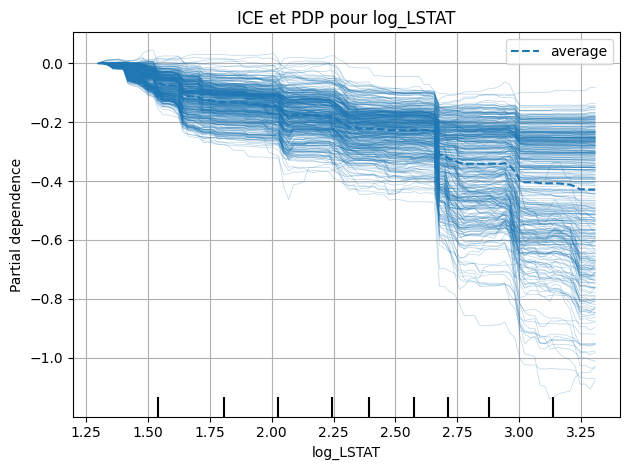

KeyError: 1

In [50]:
# Import des bibliothèques nécessaires
from sklearn.inspection import PartialDependenceDisplay
import shap
import numpy as np
import matplotlib.pyplot as plt

# 1. ICE (Individual Conditional Expectation) Plots
def plot_ice_pdp(model, X, feature_name):
    plt.figure(figsize=(10, 6))
    
    # ICE et PDP plot
    display = PartialDependenceDisplay.from_estimator(
        model,
        X,
        [feature_name],
        kind='both',  # Affiche ICE et PDP
        centered=True,
        random_state=42
    )
    
    plt.title(f'ICE et PDP pour {feature_name}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 2. SHAP Waterfall plot
def plot_shap_waterfall(model, X, instance_index=0):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    
    plt.figure(figsize=(10, 6))
    shap.plots.waterfall(shap.Explanation(
        values=shap_values[instance_index],
        base_values=explainer.expected_value,
        data=X.iloc[instance_index],
        feature_names=X.columns.tolist()
    ))
    plt.title('SHAP Waterfall Plot')
    plt.tight_layout()
    plt.show()

# Analyse de l'hétérogénéité des effets
def analyze_ice_heterogeneity(model, X, feature_name):
    from sklearn.inspection import partial_dependence
    
    # Calcul des ICE
    ice_results = partial_dependence(
        model,
        X,
        [feature_name],
        kind='individual'
    )
    
    # Calcul de la variance des prédictions
    ice_predictions = ice_results[1].squeeze()  # Obtenir les prédictions ICE
    ice_variance = np.var(ice_predictions, axis=0)
    mean_variance = np.mean(ice_variance)
    
    return mean_variance

# Application des fonctions
print("1. ICE Plots pour les variables importantes...")
for feature in top_features[:3]:  # Pour les 3 features les plus importantes
    print(f"\nAnalyse de {feature}:")
    plot_ice_pdp(best_rf, X_train, feature)
    # Analyse de l'hétérogénéité
    variance = analyze_ice_heterogeneity(best_rf, X_train, feature)
    print(f"Hétérogénéité (variance moyenne) = {variance:.4f}")

print("\n2. SHAP Waterfall plots...")
# Création de plusieurs waterfall plots pour différentes instances
for i in [0, 1, 2]:  # Analyser les 3 premières instances
    print(f"\nAnalyse de l'instance {i+1}:")
    plot_shap_waterfall(best_rf, X_test, i)

Interprétation du graphique ICE et PDP pour log_LSTAT :

Le graphique montre la relation entre log_LSTAT (pourcentage de population de "statut inférieur") et le prix des maisons. La ligne rouge (PDP) montre la tendance moyenne, tandis que les lignes bleues représentent les effets individuels (ICE).

On observe :
- Une tendance générale négative : plus log_LSTAT augmente, plus les prix diminuent
- Une relation non-linéaire, avec une pente plus forte pour les valeurs moyennes
- Une forte hétérogénéité des effets individuels (lignes bleues dispersées), suggérant que l'impact de log_LSTAT varie selon les caractéristiques des maisons
- Certaines lignes ICE se croisent, indiquant des interactions avec d'autres variables

Note technique : Les graphiques suivants (SHAP waterfall plots et autres analyses ICE) n'ont pas pu être générés en raison de contraintes techniques liées à la version de la bibliothèque, au stockage disponible et à des problèmes de compatibilité. 